# Initial imports and high level EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
atus = pd.read_csv('atussum_0321.csv')

# Work to create activities by sex for 2021

# 1. filter to create 2021 dataframe
# 2. map atus site to major categories
1. personal care, including sleep **(atus lexicon mapping = 01)**
2. eating and drinking **(atus lexicon mapping = 11)**
3. household activities **(atus lexicon mapping = 02)**
4. purchasing goods and services **(atus lexicon mapping = 07)**
5. caring for and helping household members **(atus lexicon mapping = 03)**
6. caring for and helping nonhousehold members **(atus lexicon mapping = 04)**
7. working and work-related activities **(atux lexicon mapping = 05)**
8. educational activities **(atus lexicon mapping = 06)**
9. organizational, civic, and religious activities **(atus lexicon mapping = 10) + (atus lexicon mapping = 14)?**
10. leasure and sports **(atus lexicon mapping = 13) + **(atus lexicon mapping = 12)?****
11. telephone calls, mail, and email **(atus lexicon mapping = 16) + (atus lexicon mapping = 020903, 020904?)**
12. other activities, not elsewhere classified **atus lexicon mapping ... ?**
 
# 3. list out all categories
1. 01 = Personal Care Activities
2. 02 = Household Activities
3. 03 = Caring For & Helping Household (HH) Members
4. 04 = Caring For & Helping Nonhousehold (NonHH) Members
5. 05 = Work & Work-Related Activities
6. 06 = Education
7. 07 = Consumer Purchases
8. 08 = Professional & Personal Care Services
9. 09 = Household Services
10. 10 = Government Services & Civic Obligations
11. 11 = Eating and Drinking
12. 12 = Socializing, Relaxing, and Leisure
13. 13 = Sports, Exercise, & Recreation
14. 14 = Religious and Spiritual Activities
15. 15 = Volunteer Activities
16. 16 = Telephone Calls
17. N/A - NO CATEGORY FOR 17
18. 18 = Traveling
19. 50 = Data Codes (unable to code or not elsewhere classified (nec))



# Start creating the dataframe

### Create 2021 dataframe

In [3]:
atus_2021 = atus[atus['TUYEAR'] == 2021]
atus_2021

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
219368,20210101210037,-1,2,39,2,1,60,1,2,-1,...,0,0,0,75,0,0,0,0,0,0
219369,20210101210081,-1,1,42,2,1,30,1,2,2,...,0,0,60,150,0,0,0,0,0,0
219370,20210101210099,-1,1,39,2,1,43,1,2,2,...,0,0,0,0,0,0,0,0,0,0
219371,20210101210101,-1,1,43,2,1,23,1,1,2,...,0,0,0,0,0,0,0,0,0,0
219372,20210101210109,-1,1,40,2,1,20,1,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228450,20211212212479,-1,1,43,2,1,56,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
228451,20211212212502,-1,1,44,2,1,69,5,-1,-1,...,0,0,0,0,0,0,0,0,0,0
228452,20211212212555,-1,1,43,2,1,57,1,2,-1,...,0,0,0,0,0,0,0,0,0,0
228453,20211212212567,-1,2,43,2,1,34,1,2,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# The following formular approach will be used for 

atus_2021_columns_to_keep = ['TESEX', 'TUFNWGTP']

def calc_sum(intake_dataframe, startswith, new_sum_column_name):
    new_dataframe_name = pd.DataFrame(intake_dataframe[[c for c in intake_dataframe if c.startswith(startswith)
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])
    
    
    new_dataframe_name[new_sum_column_name] = new_dataframe_name.iloc[:,4:-1].sum(axis=1)
    #dataframe[f'{startswith}_weighted_time'] = dataframe[new_sum_column_name] * dataframe['TUFNWGTP']
    #atus_2021_columns_to_keep.append(f'{startswith}_weighted_time')
    
# take the dataframe
# create new dataframe as we did before
# calculate sum in that dataframe
# calculate weight in that dataframe
# create the groupby dataframe by sex

# and then ... merge them all together

In [5]:
#01 = Personal Care Activities

# The following calculations will be applied to all 18 activity categories defined by ATUS
# Comments in this cell can be applied to following cells, but with different activity codes
# For this one (01, Personal Care Activities), all occurrences of "01" will be replaced by
# "02" for Household Activites, "03" for Caring For & Helping Household (HH) Members, etc.

# Create a dataframe with specified columns
# The provided columns by ATUS, TESEX, TUYEAR,and TUFNWGTP will be used in all
# subsequent dataframes for each activity category and needed for calculations
# Specifically, for Personal Care Actvities, we'll also include any column that starts with 't01',
# which indicates a code for Personal Care Activity. This 't01' will be replaced in subsequent cells
# for appropirate code
atus_2021_01 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t01')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

# Create a new column that will sum all of the 't01' columns to generate
# a total for all of Personal Care Activities
atus_2021_01['atus_2021_01_sum_total'] = atus_2021_01.iloc[:,3:].sum(axis=1)

# Create a new column that multiplies the previous column by the ATUS-provided weight column
# to get a weighted total for each row
atus_2021_01['atus_2021_01_weighted_total'] = atus_2021_01['atus_2021_01_sum_total'] * atus_2021_01['TUFNWGTP']

# Group the results by sex, add all of the weighted totals, and divide them by the totals of the weight
# This will give us minutes per day per sex per activity
# Then, to convert to hours, divide by 60
# *This is the formula provided by ATUS to calculate
atus_2021_01_grouped = atus_2021_01.groupby('TESEX').sum()['atus_2021_01_weighted_total'] / atus_2021_01.groupby('TESEX').sum()['TUFNWGTP'] / 60

# Create dataframe and view
atus_2021_01_grouped_df = pd.DataFrame({'Sex': atus_2021_01_grouped.index, '01_total': atus_2021_01_grouped.values})
atus_2021_01_grouped_df

,Sex,01_total
0,1,9.493646
1,2,9.868235


In [6]:
#02 = Household Activities

# Same processes as above, just for 02 instead of 01
atus_2021_02 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t02')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_02['atus_2021_02_sum_total'] = atus_2021_02.iloc[:,3:].sum(axis=1)

atus_2021_02['atus_2021_02_weighted_total'] = atus_2021_02['atus_2021_02_sum_total'] * atus_2021_02['TUFNWGTP']

atus_2021_02_grouped = atus_2021_02.groupby('TESEX').sum()['atus_2021_02_weighted_total'] / atus_2021_02.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_02_grouped_df = pd.DataFrame({'Sex': atus_2021_02_grouped.index, '02_total': atus_2021_02_grouped.values})
atus_2021_02_grouped_df

,Sex,02_total
0,1,1.530127
1,2,2.334792


In [7]:
# Now that we have 01 and 02 calculated, merge them together on the 'Sex'
# column to start building the final dataframe
atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_01_grouped_df, atus_2021_02_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total
0,1,9.493646,1.530127
1,2,9.868235,2.334792


In [8]:
#03 = Caring For & Helping Household (HH) Members

# Same processes as above, just for 03
atus_2021_03 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t03')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_03['atus_2021_03_sum_total'] = atus_2021_03.iloc[:,3:].sum(axis=1)

atus_2021_03['atus_2021_03_weighted_total'] = atus_2021_03['atus_2021_03_sum_total'] * atus_2021_03['TUFNWGTP']

atus_2021_03_grouped = atus_2021_03.groupby('TESEX').sum()['atus_2021_03_weighted_total'] / atus_2021_03.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_03_grouped_df = pd.DataFrame({'Sex': atus_2021_03_grouped.index, '03_total': atus_2021_03_grouped.values})

# Merge function added to this cell, we'll use this for the rest of the categories
# to continue to build final dataframe
atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_03_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total
0,1,9.493646,1.530127,0.277042
1,2,9.868235,2.334792,0.535657


In [9]:
#04 = Caring For & Helping Nonhousehold (NonHH) Members

# Same processes as above, just for 04
atus_2021_04 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t04')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_04['atus_2021_04_sum_total'] = atus_2021_04.iloc[:,3:].sum(axis=1)

atus_2021_04['atus_2021_04_weighted_total'] = atus_2021_04['atus_2021_04_sum_total'] * atus_2021_04['TUFNWGTP']

atus_2021_04_grouped = atus_2021_04.groupby('TESEX').sum()['atus_2021_04_weighted_total'] / atus_2021_04.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_04_grouped_df = pd.DataFrame({'Sex': atus_2021_04_grouped.index, '04_total': atus_2021_04_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_04_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total
0,1,9.493646,1.530127,0.277042,0.096569
1,2,9.868235,2.334792,0.535657,0.175300


In [10]:
#05 = Work & Work-Related Activities

# Same processes as above, just for 05
atus_2021_05 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t05')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_05['atus_2021_05_sum_total'] = atus_2021_05.iloc[:,3:].sum(axis=1)

atus_2021_05['atus_2021_05_weighted_total'] = atus_2021_05['atus_2021_05_sum_total'] * atus_2021_05['TUFNWGTP']

atus_2021_05_grouped = atus_2021_05.groupby('TESEX').sum()['atus_2021_05_weighted_total'] / atus_2021_05.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_05_grouped_df = pd.DataFrame({'Sex': atus_2021_05_grouped.index, '05_total': atus_2021_05_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_05_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297
1,2,9.868235,2.334792,0.535657,0.175300,2.705195


In [11]:
#06 = Education

# Same processes as above, just for 06
atus_2021_06 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t06')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_06['atus_2021_06_sum_total'] = atus_2021_06.iloc[:,3:].sum(axis=1)

atus_2021_06['atus_2021_06_weighted_total'] = atus_2021_06['atus_2021_06_sum_total'] * atus_2021_06['TUFNWGTP']

atus_2021_06_grouped = atus_2021_06.groupby('TESEX').sum()['atus_2021_06_weighted_total'] / atus_2021_06.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_06_grouped_df = pd.DataFrame({'Sex': atus_2021_06_grouped.index, '06_total': atus_2021_06_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_06_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051


In [12]:
#07 = Consumer Purchases

# Same processes as above, just for 07
atus_2021_07 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t07')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_07['atus_2021_07_sum_total'] = atus_2021_07.iloc[:,3:].sum(axis=1)

atus_2021_07['atus_2021_07_weighted_total'] = atus_2021_07['atus_2021_07_sum_total'] * atus_2021_07['TUFNWGTP']

atus_2021_07_grouped = atus_2021_07.groupby('TESEX').sum()['atus_2021_07_weighted_total'] / atus_2021_07.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_07_grouped_df = pd.DataFrame({'Sex': atus_2021_07_grouped.index, '07_total': atus_2021_07_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_07_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784


In [13]:
#08 = Professional & Personal Care Services

# Same processes as above, just for 08
atus_2021_08 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t08')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_08['atus_2021_08_sum_total'] = atus_2021_08.iloc[:,3:].sum(axis=1)

atus_2021_08['atus_2021_08_weighted_total'] = atus_2021_08['atus_2021_08_sum_total'] * atus_2021_08['TUFNWGTP']

atus_2021_08_grouped = atus_2021_08.groupby('TESEX').sum()['atus_2021_08_weighted_total'] / atus_2021_08.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_08_grouped_df = pd.DataFrame({'Sex': atus_2021_08_grouped.index, '08_total': atus_2021_08_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_08_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743


In [14]:
#09 = Household Services

# Same processes as above, just for 09
atus_2021_09 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t09')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_09['atus_2021_09_sum_total'] = atus_2021_09.iloc[:,3:].sum(axis=1)

atus_2021_09['atus_2021_09_weighted_total'] = atus_2021_09['atus_2021_09_sum_total'] * atus_2021_09['TUFNWGTP']

atus_2021_09_grouped = atus_2021_09.groupby('TESEX').sum()['atus_2021_09_weighted_total'] / atus_2021_09.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_09_grouped_df = pd.DataFrame({'Sex': atus_2021_09_grouped.index, '09_total': atus_2021_09_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_09_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381


In [15]:
#10 = Government Services & Civic Obligations

# Same processes as above, just for 10
atus_2021_10 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t10')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_10['atus_2021_10_sum_total'] = atus_2021_10.iloc[:,3:].sum(axis=1)

atus_2021_10['atus_2021_10_weighted_total'] = atus_2021_10['atus_2021_10_sum_total'] * atus_2021_10['TUFNWGTP']

atus_2021_10_grouped = atus_2021_10.groupby('TESEX').sum()['atus_2021_10_weighted_total'] / atus_2021_10.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_10_grouped_df = pd.DataFrame({'Sex': atus_2021_10_grouped.index, '10_total': atus_2021_10_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_10_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264


In [16]:
#11 = Eating and Drinking

# Same processes as above, just for 11
atus_2021_11 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t11')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_11['atus_2021_11_sum_total'] = atus_2021_11.iloc[:,3:].sum(axis=1)

atus_2021_11['atus_2021_11_weighted_total'] = atus_2021_11['atus_2021_11_sum_total'] * atus_2021_11['TUFNWGTP']

atus_2021_11_grouped = atus_2021_11.groupby('TESEX').sum()['atus_2021_11_weighted_total'] / atus_2021_11.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_11_grouped_df = pd.DataFrame({'Sex': atus_2021_11_grouped.index, '11_total': atus_2021_11_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_11_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total,11_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135,1.127662
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264,1.092301


In [17]:
#12 = Socializing, Relaxing, and Leisure

# Same processes as above, just for 12
atus_2021_12 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t12')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_12['atus_2021_12_sum_total'] = atus_2021_12.iloc[:,3:].sum(axis=1)

atus_2021_12['atus_2021_12_weighted_total'] = atus_2021_12['atus_2021_12_sum_total'] * atus_2021_12['TUFNWGTP']

atus_2021_12_grouped = atus_2021_12.groupby('TESEX').sum()['atus_2021_12_weighted_total'] / atus_2021_12.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_12_grouped_df = pd.DataFrame({'Sex': atus_2021_12_grouped.index, '12_total': atus_2021_12_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_12_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total,11_total,12_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135,1.127662,5.026272
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264,1.092301,4.530824


In [18]:
#13 = Sports, Exercise, & Recreation

# Same processes as above, just for 13
atus_2021_13 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t13')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_13['atus_2021_13_sum_total'] = atus_2021_13.iloc[:,3:].sum(axis=1)

atus_2021_13['atus_2021_13_weighted_total'] = atus_2021_13['atus_2021_13_sum_total'] * atus_2021_13['TUFNWGTP']

atus_2021_13_grouped = atus_2021_13.groupby('TESEX').sum()['atus_2021_13_weighted_total'] / atus_2021_13.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_13_grouped_df = pd.DataFrame({'Sex': atus_2021_13_grouped.index, '13_total': atus_2021_13_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_13_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total,11_total,12_total,13_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135,1.127662,5.026272,0.408614
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264,1.092301,4.530824,0.265777


In [19]:
#14 = Religious and Spiritual Activities

# Same processes as above, just for 14
atus_2021_14 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t14')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_14['atus_2021_14_sum_total'] = atus_2021_14.iloc[:,3:].sum(axis=1)

atus_2021_14['atus_2021_14_weighted_total'] = atus_2021_14['atus_2021_14_sum_total'] * atus_2021_14['TUFNWGTP']

atus_2021_14_grouped = atus_2021_14.groupby('TESEX').sum()['atus_2021_14_weighted_total'] / atus_2021_14.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_14_grouped_df = pd.DataFrame({'Sex': atus_2021_14_grouped.index, '14_total': atus_2021_14_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_14_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total,11_total,12_total,13_total,14_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135,1.127662,5.026272,0.408614,0.097385
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264,1.092301,4.530824,0.265777,0.128708


In [20]:
#15 = Volunteer Activities

# Same processes as above, just for 15
atus_2021_15 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t15')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_15['atus_2021_15_sum_total'] = atus_2021_15.iloc[:,3:].sum(axis=1)

atus_2021_15['atus_2021_15_weighted_total'] = atus_2021_15['atus_2021_15_sum_total'] * atus_2021_15['TUFNWGTP']

atus_2021_15_grouped = atus_2021_15.groupby('TESEX').sum()['atus_2021_15_weighted_total'] / atus_2021_15.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_15_grouped_df = pd.DataFrame({'Sex': atus_2021_15_grouped.index, '15_total': atus_2021_15_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_15_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total,11_total,12_total,13_total,14_total,15_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135,1.127662,5.026272,0.408614,0.097385,0.100595
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264,1.092301,4.530824,0.265777,0.128708,0.079825


In [21]:
#16 = Telephone Calls

# Same processes as above, just for 16
atus_2021_16 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t16')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_16['atus_2021_16_sum_total'] = atus_2021_16.iloc[:,3:].sum(axis=1)

atus_2021_16['atus_2021_16_weighted_total'] = atus_2021_16['atus_2021_16_sum_total'] * atus_2021_16['TUFNWGTP']

atus_2021_16_grouped = atus_2021_16.groupby('TESEX').sum()['atus_2021_16_weighted_total'] / atus_2021_16.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_16_grouped_df = pd.DataFrame({'Sex': atus_2021_16_grouped.index, '16_total': atus_2021_16_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_16_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total,11_total,12_total,13_total,14_total,15_total,16_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135,1.127662,5.026272,0.408614,0.097385,0.100595,0.092779
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264,1.092301,4.530824,0.265777,0.128708,0.079825,0.226080


In [22]:
#18 = Traveling

# Same processes as above, just for 18
atus_2021_18 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t18')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_18['atus_2021_18_sum_total'] = atus_2021_18.iloc[:,3:].sum(axis=1)

atus_2021_18['atus_2021_18_weighted_total'] = atus_2021_18['atus_2021_18_sum_total'] * atus_2021_18['TUFNWGTP']

atus_2021_18_grouped = atus_2021_18.groupby('TESEX').sum()['atus_2021_18_weighted_total'] / atus_2021_18.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_18_grouped_df = pd.DataFrame({'Sex': atus_2021_18_grouped.index, '18_total': atus_2021_18_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_18_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day.T

,0,1
Sex,1.000000,2.000000
01_total,9.493646,9.868235
02_total,1.530127,2.334792
03_total,0.277042,0.535657
04_total,0.096569,0.175300
05_total,3.902297,2.705195
06_total,0.384174,0.437051
07_total,0.253464,0.376784
08_total,0.062796,0.108743
09_total,0.016698,0.018381


In [23]:
#50 = Data Codes (unable to code or not elsewhere classified (nec))

# Same processes as above, just for 50
atus_2021_50 = pd.DataFrame(atus_2021[[c for c in atus_2021 if c.startswith('t50')
                       or c == 'TESEX'
                       or c == 'TUYEAR'
                       or c == 'TUFNWGTP']])

atus_2021_50['atus_2021_50_sum_total'] = atus_2021_50.iloc[:,3:].sum(axis=1)

atus_2021_50['atus_2021_50_weighted_total'] = atus_2021_50['atus_2021_50_sum_total'] * atus_2021_50['TUFNWGTP']

atus_2021_50_grouped = atus_2021_50.groupby('TESEX').sum()['atus_2021_50_weighted_total'] / atus_2021_50.groupby('TESEX').sum()['TUFNWGTP'] / 60

atus_2021_50_grouped_df = pd.DataFrame({'Sex': atus_2021_50_grouped.index, '50_total': atus_2021_50_grouped.values})

atus_2021_combined_activity_totals_per_day = pd.merge(atus_2021_combined_activity_totals_per_day, atus_2021_50_grouped_df, on='Sex')
atus_2021_combined_activity_totals_per_day

,Sex,01_total,02_total,03_total,04_total,05_total,06_total,07_total,08_total,09_total,10_total,11_total,12_total,13_total,14_total,15_total,16_total,18_total,50_total
0,1,9.493646,1.530127,0.277042,0.096569,3.902297,0.384174,0.253464,0.062796,0.016698,0.002135,1.127662,5.026272,0.408614,0.097385,0.100595,0.092779,0.988738,0.139007
1,2,9.868235,2.334792,0.535657,0.175300,2.705195,0.437051,0.376784,0.108743,0.018381,0.002264,1.092301,4.530824,0.265777,0.128708,0.079825,0.226080,0.952963,0.161120


In [24]:
# create new csv to be used for final dataframe
atus_2021_combined_activity_totals_per_day.to_csv('2021_weights_T.csv',index=True)

In [25]:
# read the previously created csv and transpose to produce dataframe
atus_2021_combined_activity_totals_per_day = pd.read_csv('2021_weights.csv', index_col=0).T
atus_2021_combined_activity_totals_per_day

Sex,1,2
01_total,9.493646,9.868235
02_total,1.530127,2.334792
03_total,0.277042,0.535657
04_total,0.096569,0.175300
05_total,3.902297,2.705195
06_total,0.384174,0.437051
07_total,0.253464,0.376784
08_total,0.062796,0.108743
09_total,0.016698,0.018381
10_total,0.002135,0.002264


In [26]:
#create new column for activities
atus_activities = ['Personal Care Activities', 'Household Activities', 'Caring For & Helping Household (HH) Members',
                   'Caring For & Helping Nonhousehold (NonHH) Members', 'Work & Work-Related Activities',
                   'Education', 'Consumer Purchases', 'Professional & Personal Care Services', 'Household Services',
                   'Government Services & Civic Obligations', 'Eating and Drinking', 'Socializing, Relaxing, and Leisure',
                   'Sports, Exercise, & Recreation', 'Religious and Spiritual Activities', 'Volunteer Activities',
                   'Telephone Calls', 'Traveling', 'Data Codes (unable to code or not elsewhere classified (nec))']

#rename columns to have sex
atus_2021_combined_activity_totals_per_day.rename(columns = {1: 'Male', 2: 'Female'}, inplace=True)

In [27]:
# add activity names
atus_2021_combined_activity_totals_per_day['Activity'] = atus_activities
atus_2021_combined_activity_totals_per_day

Sex,Male,Female,Activity
01_total,9.493646,9.868235,Personal Care Activities
02_total,1.530127,2.334792,Household Activities
03_total,0.277042,0.535657,Caring For & Helping Household (HH) Members
04_total,0.096569,0.175300,Caring For & Helping Nonhousehold (NonHH) Members
05_total,3.902297,2.705195,Work & Work-Related Activities
06_total,0.384174,0.437051,Education
07_total,0.253464,0.376784,Consumer Purchases
08_total,0.062796,0.108743,Professional & Personal Care Services
09_total,0.016698,0.018381,Household Services
10_total,0.002135,0.002264,Government Services & Civic Obligations


In [28]:
#reverse order so low level activities are up top
atus_2021_combined_activity_totals_per_day = atus_2021_combined_activity_totals_per_day.sort_values(by='Female')

atus_2021_combined_activity_totals_per_day

Sex,Male,Female,Activity
10_total,0.002135,0.002264,Government Services & Civic Obligations
09_total,0.016698,0.018381,Household Services
15_total,0.100595,0.079825,Volunteer Activities
08_total,0.062796,0.108743,Professional & Personal Care Services
14_total,0.097385,0.128708,Religious and Spiritual Activities
50_total,0.139007,0.161120,Data Codes (unable to code or not elsewhere cl...
04_total,0.096569,0.175300,Caring For & Helping Nonhousehold (NonHH) Members
16_total,0.092779,0.226080,Telephone Calls
13_total,0.408614,0.265777,"Sports, Exercise, & Recreation"
07_total,0.253464,0.376784,Consumer Purchases


In [29]:
atus_2021_combined_activity_totals_per_day_dropped = atus_2021_combined_activity_totals_per_day.iloc[:6]
atus_2021_combined_activity_totals_per_day_dropped

Sex,Male,Female,Activity
10_total,0.002135,0.002264,Government Services & Civic Obligations
09_total,0.016698,0.018381,Household Services
15_total,0.100595,0.079825,Volunteer Activities
08_total,0.062796,0.108743,Professional & Personal Care Services
14_total,0.097385,0.128708,Religious and Spiritual Activities
50_total,0.139007,0.161120,Data Codes (unable to code or not elsewhere cl...


In [30]:
# look at these columns and see what they total
# since, combined, they total <1hr/day, we will drop for further analysis
atus_2021_combined_activity_totals_per_day_dropped['Male'].sum() + atus_2021_combined_activity_totals_per_day_dropped['Female'].sum()

0.9176555960315149

In [31]:
# remove the bottom six categories (above) - they are not part of our initial research and have 
# a combined <1 hour per day (our cutoff)

atus_2021_combined_activity_totals_per_day = atus_2021_combined_activity_totals_per_day.iloc[6:]
atus_2021_combined_activity_totals_per_day

Sex,Male,Female,Activity
04_total,0.096569,0.175300,Caring For & Helping Nonhousehold (NonHH) Members
16_total,0.092779,0.226080,Telephone Calls
13_total,0.408614,0.265777,"Sports, Exercise, & Recreation"
07_total,0.253464,0.376784,Consumer Purchases
06_total,0.384174,0.437051,Education
03_total,0.277042,0.535657,Caring For & Helping Household (HH) Members
18_total,0.988738,0.952963,Traveling
11_total,1.127662,1.092301,Eating and Drinking
02_total,1.530127,2.334792,Household Activities
05_total,3.902297,2.705195,Work & Work-Related Activities


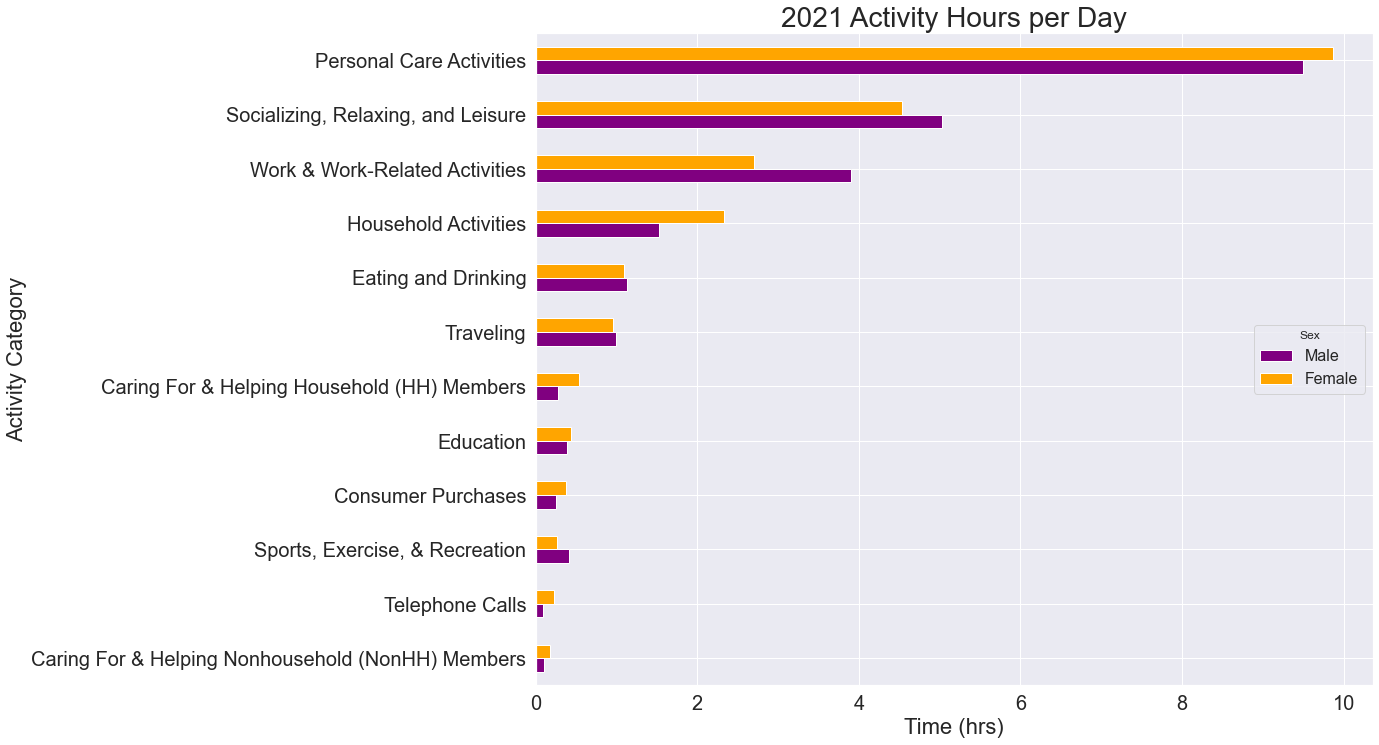

In [41]:
# Create a horizontal bar chart to show each activity
# and each sex's hr/day in associated activity

sns.set_theme()

atus_2021_combined_activity_totals_per_day.set_index('Activity').plot(
    kind='barh',
    stacked = False,
    color = {'Male': 'purple', 'Female': 'orange'})

plt.rcParams['figure.figsize'] = [15, 12]

plt.title("2021 Activity Hours per Day", fontsize = 28)
plt.xlabel("Time (hrs)", fontsize = 22)
plt.ylabel("Activity Category", fontsize = 22)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.legend(fancybox=True,loc='right',fontsize = 16,title='Sex')

plt.rc('axes', labelsize=14) 

In [33]:
# Create a new dataframe that will show the raw difference between the sexes

atus_2021_combined_activity_totals_per_day_diff = atus_2021_combined_activity_totals_per_day.copy(deep=True)
atus_2021_combined_activity_totals_per_day_diff['Raw Difference Female vs. Male'] = atus_2021_combined_activity_totals_per_day_diff['Female']\
                                                                        - atus_2021_combined_activity_totals_per_day_diff['Male']
atus_2021_combined_activity_totals_per_day_diff

Sex,Male,Female,Activity,Raw Difference Female vs. Male
04_total,0.096569,0.175300,Caring For & Helping Nonhousehold (NonHH) Members,0.078731
16_total,0.092779,0.226080,Telephone Calls,0.133301
13_total,0.408614,0.265777,"Sports, Exercise, & Recreation",-0.142837
07_total,0.253464,0.376784,Consumer Purchases,0.123320
06_total,0.384174,0.437051,Education,0.052877
03_total,0.277042,0.535657,Caring For & Helping Household (HH) Members,0.258615
18_total,0.988738,0.952963,Traveling,-0.035775
11_total,1.127662,1.092301,Eating and Drinking,-0.035362
02_total,1.530127,2.334792,Household Activities,0.804665
05_total,3.902297,2.705195,Work & Work-Related Activities,-1.197102


In [34]:
# Create a new dataframe that will show the percent difference between the sexes

atus_2021_combined_activity_totals_per_day_diff['Percent Difference Female vs. Male'] = atus_2021_combined_activity_totals_per_day_diff['Raw Difference Female vs. Male']\
                                                                            / atus_2021_combined_activity_totals_per_day_diff['Male']
atus_2021_combined_activity_totals_per_day_diff

Sex,Male,Female,Activity,Raw Difference Female vs. Male,Percent Difference Female vs. Male
04_total,0.096569,0.175300,Caring For & Helping Nonhousehold (NonHH) Members,0.078731,0.815278
16_total,0.092779,0.226080,Telephone Calls,0.133301,1.436766
13_total,0.408614,0.265777,"Sports, Exercise, & Recreation",-0.142837,-0.349566
07_total,0.253464,0.376784,Consumer Purchases,0.123320,0.486539
06_total,0.384174,0.437051,Education,0.052877,0.137638
03_total,0.277042,0.535657,Caring For & Helping Household (HH) Members,0.258615,0.933489
18_total,0.988738,0.952963,Traveling,-0.035775,-0.036183
11_total,1.127662,1.092301,Eating and Drinking,-0.035362,-0.031358
02_total,1.530127,2.334792,Household Activities,0.804665,0.525881
05_total,3.902297,2.705195,Work & Work-Related Activities,-1.197102,-0.306768


In [35]:
# sort by raw difference column

atus_2021_combined_activity_totals_per_day_diff.sort_values(by='Raw Difference Female vs. Male', ascending=False)

Sex,Male,Female,Activity,Raw Difference Female vs. Male,Percent Difference Female vs. Male
02_total,1.530127,2.334792,Household Activities,0.804665,0.525881
01_total,9.493646,9.868235,Personal Care Activities,0.374589,0.039457
03_total,0.277042,0.535657,Caring For & Helping Household (HH) Members,0.258615,0.933489
16_total,0.092779,0.226080,Telephone Calls,0.133301,1.436766
07_total,0.253464,0.376784,Consumer Purchases,0.123320,0.486539
04_total,0.096569,0.175300,Caring For & Helping Nonhousehold (NonHH) Members,0.078731,0.815278
06_total,0.384174,0.437051,Education,0.052877,0.137638
11_total,1.127662,1.092301,Eating and Drinking,-0.035362,-0.031358
18_total,0.988738,0.952963,Traveling,-0.035775,-0.036183
13_total,0.408614,0.265777,"Sports, Exercise, & Recreation",-0.142837,-0.349566


<AxesSubplot:xlabel='Sex', ylabel='Activity'>

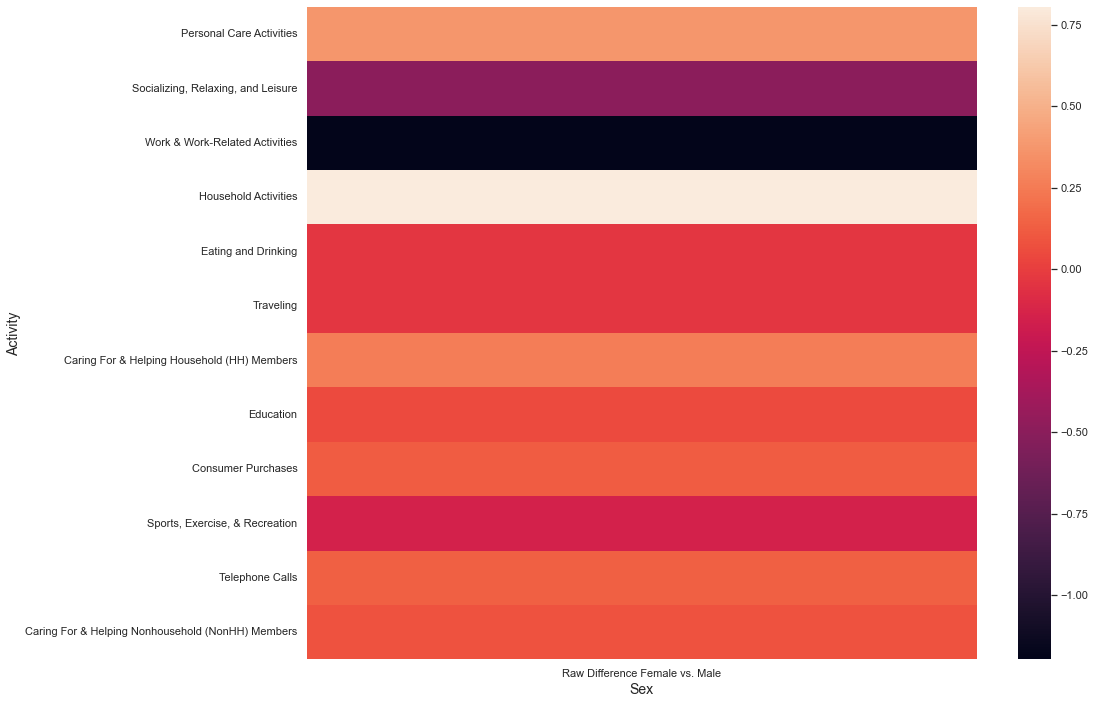

In [36]:
# try heat map for visual
# did not use this, chose to use table instead

atus_2021_combined_activity_totals_per_day_diff_raw = atus_2021_combined_activity_totals_per_day_diff[\
                                                    ['Activity', 'Raw Difference Female vs. Male']]\
                                                    .set_index('Activity').iloc[::-1]

cmap = sns.color_palette("rocket", as_cmap=True)
sns.heatmap(atus_2021_combined_activity_totals_per_day_diff_raw, cmap=cmap)

<AxesSubplot:xlabel='Sex', ylabel='Activity'>

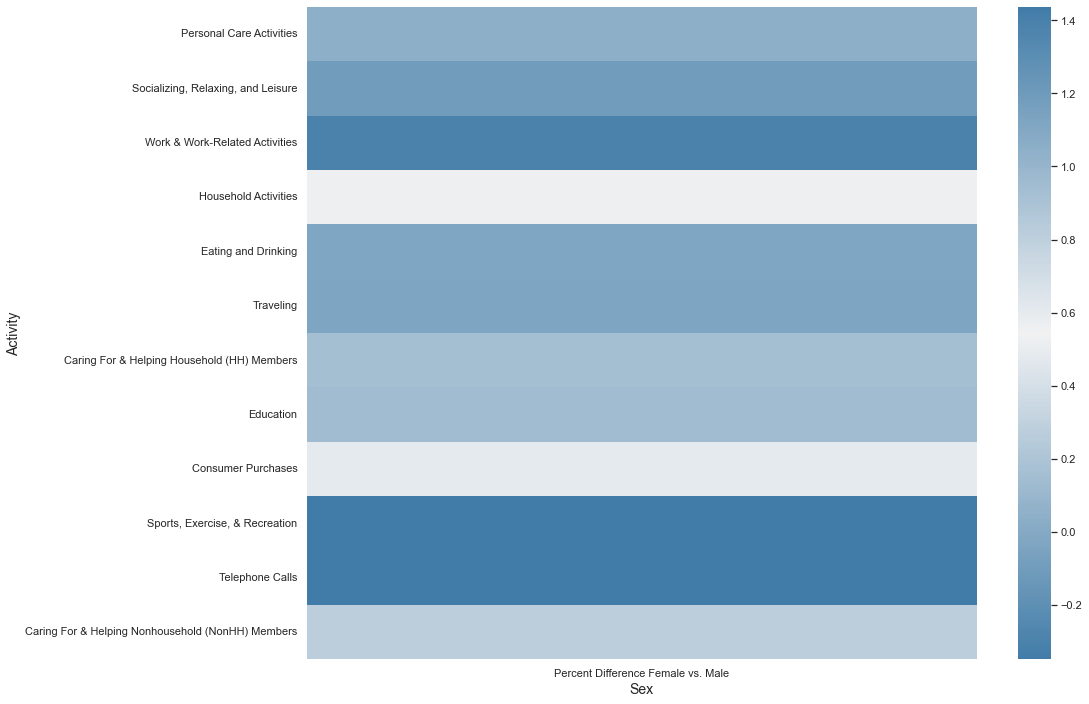

In [37]:
# try heat map for visual
# did not use this, chose to use table instead

atus_2021_combined_activity_totals_per_day_diff_percent = atus_2021_combined_activity_totals_per_day_diff[\
                                                        ['Activity', 'Percent Difference Female vs. Male']]\
                                                        .set_index('Activity').iloc[::-1]

cmap = sns.diverging_palette(240,240, as_cmap=True)
sns.heatmap(atus_2021_combined_activity_totals_per_day_diff_percent, cmap=cmap)

In [38]:
# sort raw values

atus_2021_combined_activity_totals_per_day_diff_raw.sort_values(by='Raw Difference Female vs. Male', ascending=False)

Sex,Raw Difference Female vs. Male
Activity,
Household Activities,0.804665
Personal Care Activities,0.374589
Caring For & Helping Household (HH) Members,0.258615
Telephone Calls,0.133301
Consumer Purchases,0.123320
Caring For & Helping Nonhousehold (NonHH) Members,0.078731
Education,0.052877
Eating and Drinking,-0.035362
Traveling,-0.035775


In [39]:
# sort percent diff
atus_2021_combined_activity_totals_per_day_diff_percent.sort_values(by='Percent Difference Female vs. Male',\
                                                                    ascending=False)

Sex,Percent Difference Female vs. Male
Activity,
Telephone Calls,1.436766
Caring For & Helping Household (HH) Members,0.933489
Caring For & Helping Nonhousehold (NonHH) Members,0.815278
Household Activities,0.525881
Consumer Purchases,0.486539
Education,0.137638
Personal Care Activities,0.039457
Eating and Drinking,-0.031358
Traveling,-0.036183


In [40]:
# merge dataframe for appendix

pd.merge(atus_2021_combined_activity_totals_per_day_diff_raw,\
         atus_2021_combined_activity_totals_per_day_diff_percent,\
         on='Activity').sort_values(by='Raw Difference Female vs. Male', ascending=False)

Sex,Raw Difference Female vs. Male,Percent Difference Female vs. Male
Activity,,
Household Activities,0.804665,0.525881
Personal Care Activities,0.374589,0.039457
Caring For & Helping Household (HH) Members,0.258615,0.933489
Telephone Calls,0.133301,1.436766
Consumer Purchases,0.123320,0.486539
Caring For & Helping Nonhousehold (NonHH) Members,0.078731,0.815278
Education,0.052877,0.137638
Eating and Drinking,-0.035362,-0.031358
Traveling,-0.035775,-0.036183
